# NLP Gensim Tutorial

Create a Corpus from a given Dataset</br>
Create a TFIDF matrix </br>
Create Bigrams and Trigrams </br>
Create Word2Vec model </br>
Create Doc2Vec model </br>
Create Topic Model with LDA</br>
Create Topic Model with LSI</br>
Compute Similarity Matrices</br>
Summarize text document</br>

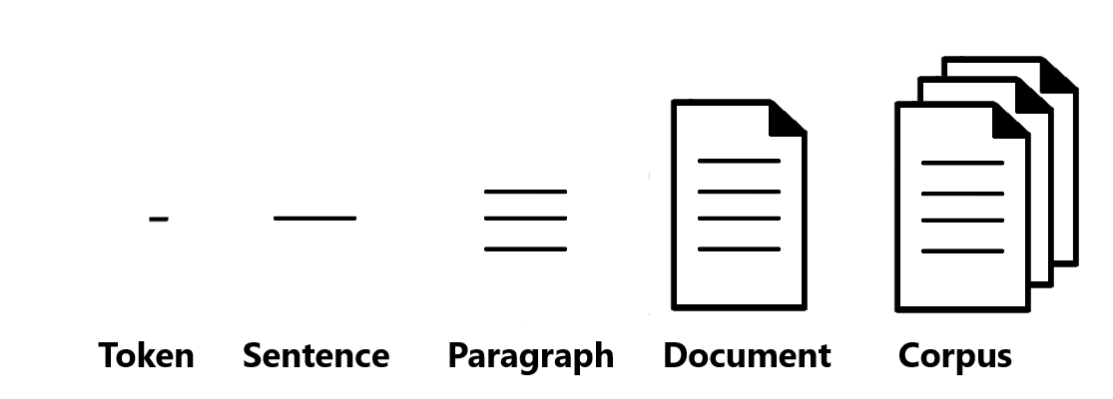

Create a Corpus from a given Dataset

In [1]:
# pip install gensim

In [35]:
import gensim
import gensim.downloader as api
from gensim.utils import simple_preprocess

In [37]:
api.info() # list all the dataset metadata and it's informtion
dataset = api.load("fake-news")
dataset_words = [word for word in dataset]
corpus = [dict_object["text"] for dict_object in dataset_words]
corpus[0:2]

['Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! \nWe’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related',
 'Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran

Create Bag of Words

In [41]:
print("Document list in corpus",len(corpus))

Document list in corpus 12999


Step 1 : document --> token

In [42]:
tokenized_document = []
for document in corpus:
  tokenized_document.append(simple_preprocess(document))
# tokenized_document[0:20]
print(len(tokenized_document))

12999


Step 2 : Create Dictionary

In [43]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_document)
# print("Unique words in corpus",)
dictionary

In [51]:
print("Unique words in the document", len(dictionary.dfs))

Unique words in the document 145543


Step 3 : Bag of Words

In [62]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_document]
bow_corpus[0]

[(0, 1),
 (1, 2),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 2),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 2),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 2),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 5),
 (60, 2),
 (61, 1),
 (62, 1),
 (63, 2),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 2),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1)]

Creating TFIDF matrix

In [75]:
from gensim import models
tfIdf  = models.TfidfModel(dictionary=dictionary)
tf_idf_corpus = tfIdf[bow_corpus]
tf_idf_corpus

In [81]:
tf_idf_corpus[1]

[(2, 0.014386903571135975),
 (9, 0.009116489939176681),
 (15, 0.038651010403994525),
 (21, 0.0180505342834603),
 (27, 0.013499492131203354),
 (30, 0.023938627172859713),
 (35, 0.009633357918691117),
 (39, 0.007821341750262724),
 (40, 0.006533935159846865),
 (44, 0.024779444241042496),
 (47, 0.04148161022193761),
 (49, 0.03072714517983467),
 (59, 0.02349767468832788),
 (61, 0.0077810367691395314),
 (62, 0.004643697718831538),
 (63, 0.031001421804886787),
 (70, 0.020057850222741647),
 (71, 0.009195916629506995),
 (73, 0.03586675386657469),
 (74, 0.01977804893662246),
 (75, 0.051891058290858716),
 (76, 0.06315684730553997),
 (77, 0.051252415967739794),
 (78, 0.04941977482278341),
 (79, 0.018552550047268346),
 (80, 0.013614390110024294),
 (81, 0.07657025254515251),
 (82, 0.014775472687285667),
 (83, 0.051659534853769694),
 (84, 0.005549439936137727),
 (85, 0.06016908053101417),
 (86, 0.051751674654271614),
 (87, 0.0123360002810952),
 (88, 0.168518262619524),
 (89, 0.08296322044387522),
 (9